# Assignment 1: Multi-Class Classification - Glass Identification Dataset

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

## Data Loading and Preprocessing

In [2]:
#load dataset

glass = pd.read_csv("C:/Users/tania/Documents/Mercer University/INFD 615/glass.csv")
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [3]:
#check for missing values

print(glass.info())
print(glass.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


The Glass Identification dataset was obtained from the UCI Machine Learning Repository and loaded into a Pandas DataFrame for analysis. The dataset contains 214 observations and ten attributes, including nine chemical composition variables and one target variable representing the glass type. Each sample corresponds to a different kind of glass, such as building windows, containers, or tableware, categorized by numeric labels from 1 to 7.

Initial inspection confirmed that the dataset contained no missing values, so no imputation was required. All features were numeric, and the target variable was already in a suitable format for classification. 

## Exploratory Data Analysis (EDA)

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

C:\Users\tania\AppData\Local\Temp\ipykernel_24704\3220472245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=glass, palette='Set2')


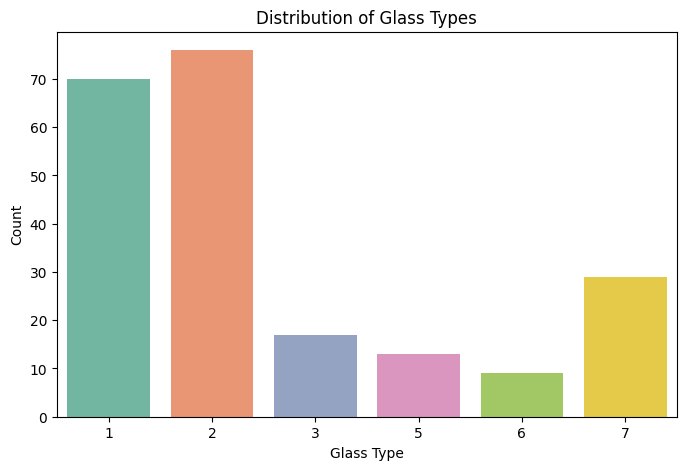

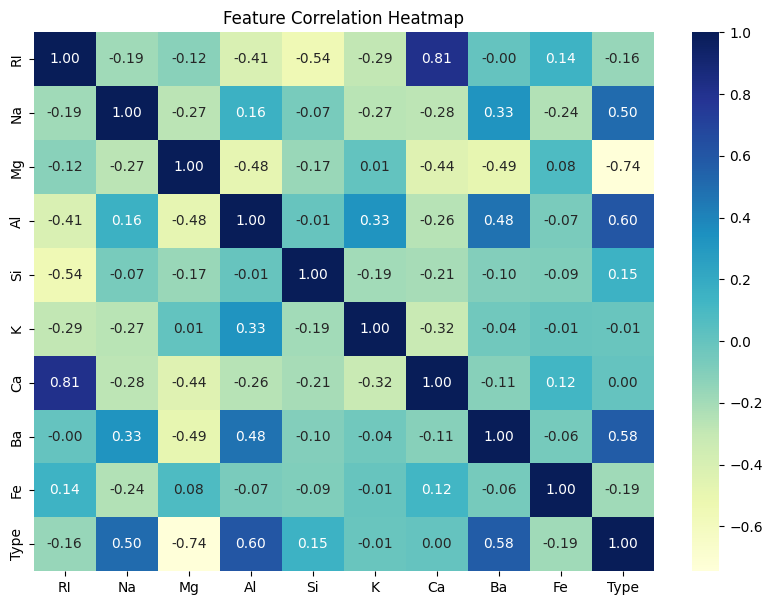

In [4]:
#summary statistics

print(glass.describe())

#distribution of target classes

plt.figure(figsize=(8,5))
sns.countplot(x='Type', data=glass, palette='Set2')
plt.title("Distribution of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.show()

#correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(glass.corr(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



The summary results show that the Refractive Index (RI) has a small standard deviation of 0.003 meaning most glasses have very similar refractive index values. Na(Sodium) and Si(Silicon) are present in higher amounts, consistent with glass composition. Ba(Barium) anf Fe(Iron) have small means and large ranges relative to their means, indicating most glasses have no barium or iron, but a few do have significant amounts. The Type column ranges from 1 to 7 representing the glass categories. 

The bar plot shows that Types 1 and 2 represent the majority of glass samples. Types 3,5, and 6 are much less frequent, which indicates a class imbalance. 

RI and Ca have a strong positive correlation(0.81) so as calcium increases, the refractive index increases. Mg and Ba have a strong negative correlation(-0.49) suggesting they might substitute for each other in glass composition. Mg also has a strong negative correlation(-0.74) with Type meaning certain glasses have a lower magnesium content. Al and Type also have a moderate positive correlation(0.60). 

## Model Training - Decision Tree Classifier

In [ ]:
#split data

X = glass.drop("Type", axis = 1)
y = glass["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#train data

dt_model = DecisionTreeClassifier(random_state = 42, max_depth = 5)
dt_model.fit(X_train, y_train)

#model prediction

y_pred = dt_model.predict(X_test)
print(y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))


[7 5 2 5 1 2 3 5 1 1 3 1 7 6 3 7 7 1 2 2 1 1 7 2 1 3 2 2 2 2 7 1 1 7 2 2 1
 1 6 1 7 2 6]
Accuracy: 0.7441860465116279


For model training, a Decision Tree Classifier was selected due to its interpretability and ability to handle nonlinear feature interactions. 
The model was trained on the training data and then used to predict class labels for the test data. Decision trees were chosen over simpler models like logistic regression because of their ability to capture complex relationships among features, which is particularly beneficial in multi-class datasets like this one. Although decision trees can be prone to over fitting, setting a controlled depth helped balance performance and generalization.

80% of the data was used for training and 20% for testing, stratify = y ensures that each glass type is proportionally represented in both sets. The Decision Tree uses a max depth 0f 5 to prevent over fitting. The model predicted glass types for 43 test samples. The accuracy is 74.4% meaning the model got 32 out of the 43 predictions correct. 

## Confusion Matrix Creation and Analysis


Confusion Matrix:
 [[11  2  0  0  0  1]
 [ 1  9  2  1  1  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


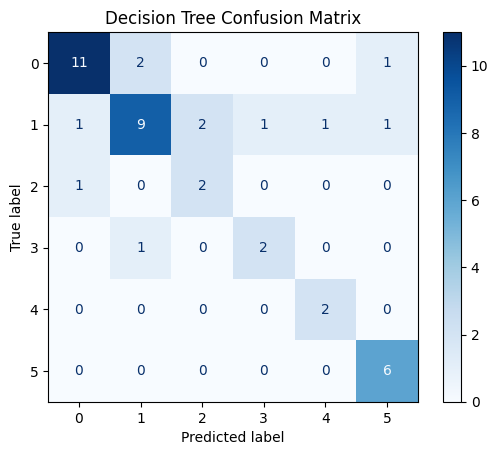

              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.75      0.60      0.67        15
           3       0.50      0.67      0.57         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       0.75      1.00      0.86         6

    accuracy                           0.74        43
   macro avg       0.70      0.79      0.73        43
weighted avg       0.75      0.74      0.74        43



In [6]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

#classification report 

print(classification_report(y_test, y_pred))

After generating predictions, a confusion matrix was created to visualize model performance across all seven glass classes. The diagonal values(11,9,2,2,2,6) represent correct predictions that the model correctly identified. The off diagonal values show misclassifications. The confusion matrix revealed that most predictions for types 1, 2, and 7 were correct, while some misclassifications occurred between similar classes, particularly between types 1 and 2, which share similar chemical properties. This overlap is common in glass data due to the small differences in composition between these categories.

The model achieved an overall accuracy of approximately 74%. The classification report showed strong recall for classes 6 and 7 (both 1.00), indicating that the model identified all samples of these types correctly. Classes 1 and 2, while having high support, experienced some confusion with one another. Class 3 had low precision (0.50). The F1-scores across all classes ranged from 0.57 to 0.86, suggesting generally consistent but slightly variable performance. 

## Report Summary and Conclusion

Loaded and cleaned the Glass Identification dataset from UCI.
Conducted EDA to understand feature relationships and class distribution.
Trained a Decision Tree Classifier (depth=5).
Evaluated performance using a confusion matrix and classification metrics.

The Glass Identification dataset consists of 214 samples with 9 chemical composition features. Descriptive statistics show that while most glasses have consistent base compositions, elements like Ba and Fe vary widely. The distribution plot highlights class imbalance, with Types 1 and 2 being most frequent. The correlation heatmap indicates that magnesium, aluminum, and barium concentrations are key distinguishing features for different glass types. These insights guided feature understanding before applying the Decision Tree classifier.

This analysis demonstrated a complete workflow for a multi-class classification problem using the Glass Identification dataset. The Decision Tree Classifier performed well with an overall accuracy of 74%, successfully distinguishing most glass types with reasonable precision and recall. However, class imbalance and feature overlap led to some misclassifications between chemically similar glass types.

From the exploratory analysis and model evaluation, it is evident that chemical attributes such as Magnesium, Aluminum, and Barium are key indicators for identifying glass type. The confusion matrix provided valuable insight into which classes were most frequently misidentified, guiding potential improvements. Future steps could include testing more advanced models such as Random Forests or Gradient Boosted Trees to improve accuracy and robustness. Additionally, techniques like cross-validation or SMOTE (Synthetic Minority Oversampling Technique) could be applied to address class imbalance and enhance model generalization.